<a href="https://colab.research.google.com/github/aryalal11/TeslaStockPrediction/blob/main/teslastockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
import yfinance as yf
ticker_symbol = "TSLA"
df = yf.download(ticker_symbol, start="2024-01-01", end="2025-01-01")
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200
2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600
2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300
2024-01-05  237.490005  240.119995  234.899994  236.860001   92379400
2024-01-08  240.449997  241.250000  235.300003  236.139999   85166600
...                ...         ...         ...         ...        ...
2024-12-24  462.279999  462.779999  435.140015  435.899994   59551800
2024-12-26  454.130005  465.329987  451.019989  465.160004   76366400
2024-12-27  431.660004  450.000000  426.500000  449.519989   82666800
2024-12-30  417.410004  427.000000  415.750000  419.399994   64941000
2024-12-31  403.839996  427.929993  402.540009  423.790009   76825100

[252 rows x 5 colum

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,230.614961,235.587103,225.492976,230.580715,9.483414e+07
std,70.989891,73.203948,68.410065,71.064782,3.332845e+07
min,142.050003,144.440002,138.800003,140.559998,3.716760e+07
25%,180.004997,184.504997,176.980000,181.950001,7.177158e+07
50%,210.695000,216.005005,207.654999,212.070000,8.715945e+07
75%,248.619999,251.972496,242.507504,247.590004,1.101130e+08
max,479.859985,488.540009,457.510010,475.899994,2.438697e+08


In [ ]:
columns_list = df.columns.tolist()
print(columns_list)

[('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   252 non-null    float64
 1   (High, TSLA)    252 non-null    float64
 2   (Low, TSLA)     252 non-null    float64
 3   (Open, TSLA)    252 non-null    float64
 4   (Volume, TSLA)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
df_reset = df.reset_index()
print(df_reset['Date'].head())

0   2024-01-02
1   2024-01-03
2   2024-01-04
3   2024-01-05
4   2024-01-08
Name: Date, dtype: datetime64[ns]


In [ ]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        252 non-null    datetime64[ns]
 1   (Close, TSLA)   252 non-null    float64       
 2   (High, TSLA)    252 non-null    float64       
 3   (Low, TSLA)     252 non-null    float64       
 4   (Open, TSLA)    252 non-null    float64       
 5   (Volume, TSLA)  252 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [ ]:
df_reset.columns = ['Date', 'Close_TSLA', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA']

In [ ]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         252 non-null    datetime64[ns]
 1   Close_TSLA   252 non-null    float64       
 2   Open_TSLA    252 non-null    float64       
 3   High_TSLA    252 non-null    float64       
 4   Low_TSLA     252 non-null    float64       
 5   Volume_TSLA  252 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [ ]:
px.area(df_reset,x='Date',y="Close_TSLA")

In [ ]:
px.line(df_reset,x='Date',y="Close_TSLA")

In [ ]:
px.area(df_reset,x='Date',y="Volume_TSLA")

In [ ]:
px.bar(df_reset,y="Volume_TSLA")

In [ ]:
px.box(df_reset,y="Close_TSLA")

In [ ]:
df_reset

,Date,Close_TSLA,Open_TSLA,High_TSLA,Low_TSLA,Volume_TSLA
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600
...,...,...,...,...,...,...
247,2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
248,2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
249,2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
250,2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


In [ ]:
columns=['Date','Close_TSLA']
ndf=pd.DataFrame(df_reset,columns=columns)

In [ ]:
ndf

,Date,Close_TSLA
0,2024-01-02,248.419998
1,2024-01-03,238.449997
2,2024-01-04,237.929993
3,2024-01-05,237.490005
4,2024-01-08,240.449997
...,...,...
247,2024-12-24,462.279999
248,2024-12-26,454.130005
249,2024-12-27,431.660004
250,2024-12-30,417.410004


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close_TSLA':'y'})

In [ ]:
prophet_df

,ds,y
0,2024-01-02,248.419998
1,2024-01-03,238.449997
2,2024-01-04,237.929993
3,2024-01-05,237.490005
4,2024-01-08,240.449997
...,...,...
247,2024-12-24,462.279999
248,2024-12-26,454.130005
249,2024-12-27,431.660004
250,2024-12-30,417.410004


In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rwda8dc/rec7p943.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rwda8dc/toka250i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12667', 'data', 'file=/tmp/tmp1rwda8dc/rec7p943.json', 'init=/tmp/tmp1rwda8dc/toka250i.json', 'output', 'file=/tmp/tmp1rwda8dc/prophet_model3halwgdx/prophet_model-20250114131629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-02,224.233293,197.807481,244.312806,224.233293,224.233293,-3.994981,-3.994981,-3.994981,-3.994981,-3.994981,-3.994981,0.0,0.0,0.0,220.238311
1,2024-01-03,223.666044,194.254989,242.629706,223.666044,223.666044,-4.320072,-4.320072,-4.320072,-4.320072,-4.320072,-4.320072,0.0,0.0,0.0,219.345972
2,2024-01-04,223.098796,194.207608,240.869260,223.098796,223.098796,-5.165213,-5.165213,-5.165213,-5.165213,-5.165213,-5.165213,0.0,0.0,0.0,217.933583
3,2024-01-05,222.531547,193.143718,239.356286,222.531547,222.531547,-5.159735,-5.159735,-5.159735,-5.159735,-5.159735,-5.159735,0.0,0.0,0.0,217.371812
4,2024-01-08,220.829801,191.773441,239.299015,220.829801,220.829801,-4.665168,-4.665168,-4.665168,-4.665168,-4.665168,-4.665168,0.0,0.0,0.0,216.164634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2025-01-26,527.013604,513.767354,562.159636,522.677065,531.963735,11.652590,11.652590,11.652590,11.652590,11.652590,11.652590,0.0,0.0,0.0,538.666194
278,2025-01-27,529.777890,500.487312,549.660028,525.179040,534.976378,-4.665168,-4.665168,-4.665168,-4.665168,-4.665168,-4.665168,0.0,0.0,0.0,525.112722
279,2025-01-28,532.542176,504.740792,553.162626,527.633040,538.177825,-3.994981,-3.994981,-3.994981,-3.994981,-3.994981,-3.994981,0.0,0.0,0.0,528.547194
280,2025-01-29,535.306461,507.079716,556.170313,530.160421,541.276580,-4.320072,-4.320072,-4.320072,-4.320072,-4.320072,-4.320072,0.0,0.0,0.0,530.986389


In [ ]:
px.line(forecast,x='ds',y='yhat')

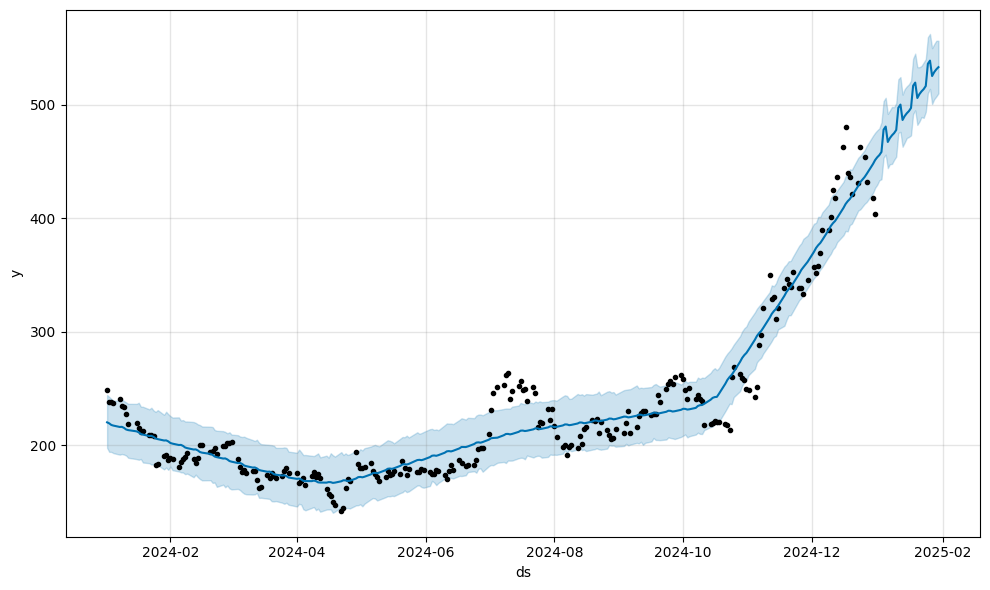

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

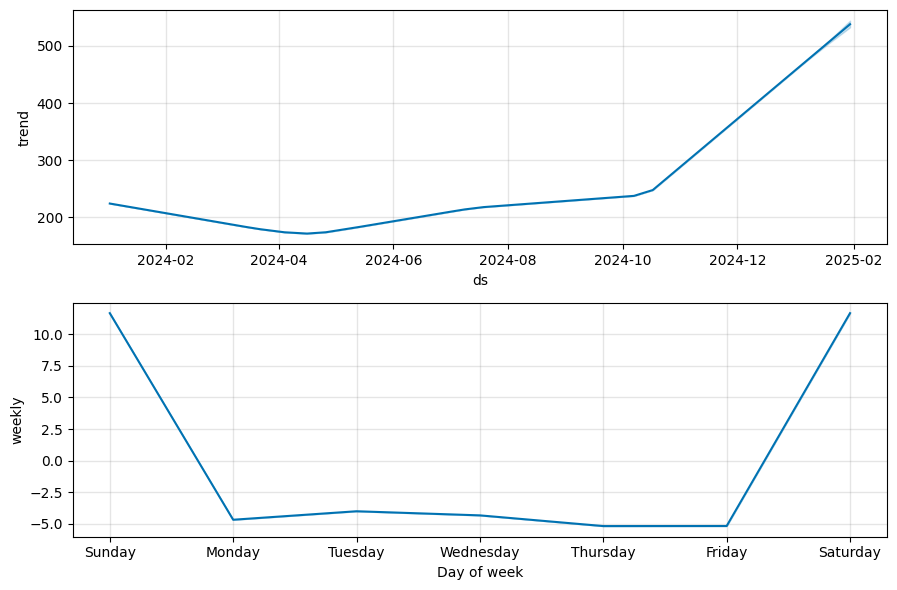

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>